# Model
Exicting part, try different types regression model.


In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [17]:
#read data, specify index so it's easier to join and search using loc
path = '../../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'model_columns_listings.csv')
listings = pd.read_csv(listings_csv, index_col = 'id')

In [18]:
#shape
listings.shape

(28364, 80)

In [20]:
listings.columns

Index(['Unnamed: 0', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'cleaning_fee_yes_no', 'security_deposit_yes_no', 'extra_people_yes_no',
       'last_review_days_ago', 'amenities_count',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island', 'prope

In [21]:
#head
listings.head(1)

,Unnamed: 0,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
id,,,,,,,,,,,,,,,,,,,,,
2595,0,733294,3.0,87%,38%,0,6.0,1,40.75362,-73.98377,...,0,0,1,0,0,0,0,0,0,1


# Features/Target


In [22]:
X = listings[['host_since', 'host_response_time', 'host_is_superhost', 'host_listings_count', 
'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 
'beds', 'security_deposit_yes_no', 'cleaning_fee_yes_no', 'guests_included','extra_people_yes_no', 'number_of_reviews', 
'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
'instant_bookable', 'reviews_per_month', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 
'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens', 
'neighbourhood_group_cleansed_Staten Island', 'amenities_count','property_type_Apartment','property_type_Barn', 
'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 
'property_type_Castle', 'property_type_Cave', 'property_type_Condominium', 'property_type_Cottage', 
'property_type_Earth house', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 
'property_type_House', 'property_type_Houseboat', 'property_type_Lighthouse','property_type_Loft', 
'property_type_Other', 'property_type_Tent', 'property_type_Tiny house', 
'property_type_Townhouse', 'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Hotel room', 
'room_type_Private room', 'room_type_Shared room', 'cancellation_policy_flexible', 
'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period', 
'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'bed_type_Airbed', 'bed_type_Couch', 
'bed_type_Futon','bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'last_review_days_ago']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression

In [23]:
#using CV
regressor = Lasso(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)


[74.12198319 74.71523612 66.74804033 76.96007742 76.28657261 70.10881314
 72.01893568 71.13614342 71.29189754 67.98524237]


In [24]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


72.13729418247233
0.5427684777302707


In [25]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

69.71033598448358
0.5646911537932038


# Ridge Regression

In [26]:
#using CV
regressor = Ridge(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)


[73.94333892 74.61221487 66.3659495  76.37827875 75.87783511 69.5235188
 71.74360947 70.6836214  71.20611567 67.9783609 ]


In [28]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


71.83128434007939
0.5487583954042164


In [29]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

69.19389899810487
0.5711170834349825


# Random Forest

In [30]:
#using CV
regressor = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[71.27182358 71.81325979 64.09074865 71.62591473 69.93897328 65.4568128
 67.00328423 65.17041028 67.35887964 64.40535661]


In [31]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

67.81354635774407
0.671715164073133


In [32]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

63.620476440636004
0.6374257350045602


# Gradient Boost

In [33]:
#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[70.23750368 69.68321713 62.69125945 69.77831949 69.81088441 64.96228859
 65.00093054 64.47894901 66.59495768 62.6899837 ]


In [34]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

66.59282936686145
0.6404002251317795


In [35]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

62.79518811842628
0.6467713897507537


# Feature Importance
this was for gradient boosting - run the same code for random forest, make sure run the fit/model first, it uses same regessor variable

In [36]:
#get features importance
features = regressor.feature_importances_

#get column names from our list of features
column_names=X.columns.values.tolist()

#match features importance to column name
df = pd.DataFrame([features], columns=column_names)


In [37]:
df.head()

,host_since,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,last_review_days_ago
0,0.006619,0.0,0.000711,0.003624,0.0,0.0,0.181736,0.147971,0.162807,0.001983,...,0.0,0.002862,0.000607,0.0,0.0,0.0,0.0,0.0,0.0,0.002572


In [38]:
#features importance sorted
features_sorted = df.iloc[0].sort_values(ascending=False)

In [28]:
features_sorted.head(60)


bedrooms                                           0.238162
accommodates                                       0.184848
room_type_Entire home/apt                          0.179028
bathrooms                                          0.169538
neighbourhood_group_cleansed_Manhattan             0.132197
property_type_Loft                                 0.011236
review_scores_rating                               0.011086
host_listings_count                                0.009773
guests_included                                    0.009043
host_since                                         0.008419
extra_people_yes_no                                0.007709
review_scores_cleanliness                          0.005327
number_of_reviews                                  0.003465
last_review_days_ago                               0.003398
reviews_per_month                                  0.003307
beds                                               0.003205
security_deposit_yes_no                 

# Using Yellowbrick to visuzlize

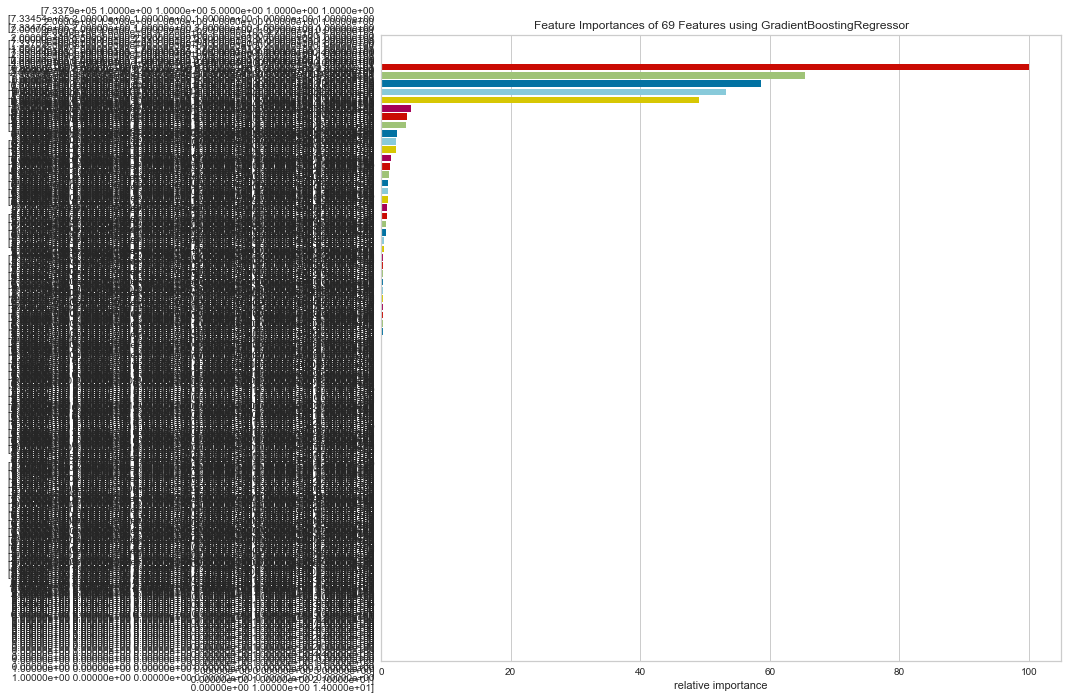

In [39]:
from yellowbrick.features import FeatureImportances

model = regressor = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

# Model Output for Testing Flask
Using very few features

In [98]:
X = listings[['bedrooms',
            'accommodates',
            'room_type_Entire home/apt',
            'bathrooms',
            'neighbourhood_group_cleansed_Manhattan',
            'property_type_Loft',
            'amenities_Free street parking']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boost
For testing flask

In [99]:
#using CV
# regressor = Lasso(alpha=0.1)
# regressor = regressor.fit(X_train, y_train) 

#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[86.69528739 77.10785964 86.53339494 84.14168615 89.65546095 87.27550644
 87.11778648 85.00449831 81.1734252  99.76561591]


In [100]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

86.44705214009849
0.5685566647172172


In [101]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

79.63597311670388
0.5470531366579381


In [102]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Webapp

In [11]:
%%HTML

'<iframe width="700" height="600" src="http://seebeyond.pythonanywhere.com" frameborder="0" allowfullscreen></iframe>'
